In [1]:
# 导入所有需要的library和package

import pandas as pd 
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

plt.style.use('_mpl-gallery')
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']= False       #显示负号

In [2]:
# 从总表中导入"总库龄数据-合计" 工作表

df_总库龄数据 = pd.read_excel("自有仓及三方仓库存库龄数据-2023年6月 (1).xlsx","总库龄数据-合计")

### 数据表：


<font color = brown>*df_总库龄数据*</font>

    “总库龄数据-合计” 工作表
   
<font color = brown>*df_仓库*</font>  

    记录了不同细分仓的各个库龄段的库存数量，也有在线库存合计的数值
    
<font color = brown>*df_仓库_T*</font> 

    将df_仓库的列与行进行了转换，为了方便画图

<font color = brown>*df_仓库仓储费*</font> 

    记录了不同细分仓的各个库龄段的每天的仓储费用

<font color = brown>*df_仓库仓储费_RMB*</font> 

    将所有仓库仓储费转换为人民币

<font color = brown>*df_仓库仓储费_RMB_T*</font> 

    将df_仓库仓储费_RMB的列与行进行了转换，为了方便画图

In [3]:
# 整理表，留下需要的列，重命名一些列以方便后续操作

df_总库龄数据 = df_总库龄数据.rename(columns = df_总库龄数据.iloc[0]).drop(df_总库龄数据.index[0])
df_总库龄数据.drop(df_总库龄数据.columns[[0,13,14,15,16]], axis = 1, inplace = True)
df_总库龄数据.rename(columns = {"自有仓":"仓库"}, inplace = True )
#df_总库龄数据

In [4]:
# 建立仓库表，重置index,drop 所有空值的row

df_仓库 = df_总库龄数据[df_总库龄数据["项目"] == "在库库存/PCS"].reset_index().drop(columns = "index").dropna()
df_仓库.head(5)

,仓库,项目,在库库存,0-30天,31-60天,61-90天,91-120天,121-180天,181-270天,271-360天,360天以上,合计
0,美东自有仓,在库库存/PCS,543251,62404,25682,136697,15154,48554,69511,75037,110212,543251
1,美西自有仓,在库库存/PCS,346162,62664,63338,26648,19271,68883,13750,8397,83211,346162
2,捷克自有仓,在库库存/PCS,193565,79020,16494,16454,13623,12889,31173,2042,21870,193565
3,4PX英国仓,在库库存/PCS,3129,0,242,0,1,0,898,57,1931,3129
4,51英国仓,在库库存/PCS,12722,509,153,8,1528,1810,561,3264,4889,12722


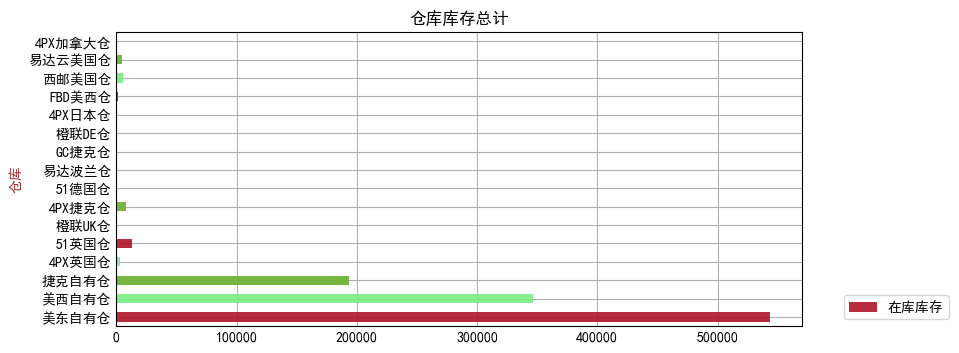

In [5]:
# 画图呈现仓库库存总计

ax  = df_仓库.plot(
    kind = 'barh', 
    figsize =(7,3),
    alpha = 0.9,
    y = "在库库存",
    x = "仓库",
    color = np.random.rand(4,3))

ax.set_ylabel('仓库', color='brown')
ax.set_title('仓库库存总计', color='black')

# 使用log设置y轴的值， 让数据的呈现更加清晰

ax.legend( loc='lower left', bbox_to_anchor=(1.05, 0))
plt.show()




在所有的细分仓中，自有仓的总库存数量最多，远远高于其他的细分仓。
在自有仓当中，美东自有仓的库存最多，是捷克自有仓的两倍之多。

在接下来的数据处理中，我会把自有仓和三方仓分开处理。因为自有仓的数值远远高于三方仓，放在一起作图不利于观察。
***

### 仓储费和库存数量

高得库存数量一定代表高的仓储费吗？在特定库龄段里，库存数量和仓储费/天有什么样的关系呢？


***

In [6]:
# 建立新表，得到仓储费信息，drop不需要的col，以及最后3行不需要的信息

pd.set_option("display.precision", 2) # 设置显示小数点后两位

df_仓库仓储费 = df_总库龄数据[df_总库龄数据.项目.str.startswith('仓储费')].\
                reset_index(drop = True).drop(columns = ['仓库','在库库存' ,'合计']).iloc[0:17].rename(columns = {'项目' : '仓储费'}).\
                dropna().reset_index(drop = True)

df_仓库仓储费['仓库'] = ['美东自有仓', '美西自有仓', '捷克自有仓', '4PX英国仓', '51英国仓', '橙联UK仓', '4PX捷克仓',\
                           '51德国仓', '易达波兰仓', 'GC捷克仓', '橙联DE仓', '4PX日本仓', 'FBD美西仓', '西邮美国仓',\
                           '易达云美国仓', '4PX加拿大仓']

df_仓库仓储费 = df_仓库仓储费.set_index('仓库')

# 将所有仓储费转换为RMB， 方便作图进行直观的比较

df_USD = df_仓库仓储费[df_仓库仓储费.仓储费.str.contains('USD')].iloc[:, 1:] * 6.9240 
df_GBP = df_仓库仓储费[df_仓库仓储费.仓储费.str.contains('GBP')].iloc[:, 1:] * 8.6504 
df_EUR = df_仓库仓储费[df_仓库仓储费.仓储费.str.contains('EUR')].iloc[:, 1:] * 7.6361 
df_CAD = df_仓库仓储费[df_仓库仓储费.仓储费.str.contains('CAD')].iloc[:, 1:] * 5.0893 
df_JPY = df_仓库仓储费[df_仓库仓储费.仓储费.str.contains('JPY')].iloc[:, 1:] * 0.0517 

# 建立新的df,所有仓储费的单位都是人民币/元

df_仓库仓储费_RMB = pd.concat([df_USD, df_GBP,df_EUR,df_CAD, df_JPY])
df_仓库仓储费_RMB.head(5)

# transpose df_仓库仓储费_RMB 

df_仓库仓储费_RMB_T = df_仓库仓储费_RMB.iloc[:, :].T
df_仓库仓储费_RMB_T.head(5)

仓库,美东自有仓,美西自有仓,捷克自有仓,FBD美西仓,西邮美国仓,易达云美国仓,4PX加拿大仓,4PX英国仓,51英国仓,橙联UK仓,4PX捷克仓,51德国仓,易达波兰仓,GC捷克仓,橙联DE仓,4PX日本仓
0-30天,0.0,0.0,0.0,0.0,0.0,0.0,714.61,0.0,0.0,0.0,30.26,0.0,0.0,0.0,0.09,0.0
31-60天,2614.92,12522.2,2459.75,0.0,1121.28,0.0,0.0,0.0,20.82,0.0,13.83,0.0,0.53,0.0,0.0,1.65
61-90天,1473.44,3392.58,2487.91,0.0,404.27,0.28,0.0,0.0,4.53,0.0,1.23,0.0,0.0,0.0,0.0,0.0
91-120天,1737.84,2743.73,1319.96,0.0,183.07,0.0,0.0,0.18,148.57,0.0,4.89,0.0,54.94,0.0,0.0,0.86
121-180天,3983.35,5826.52,699.39,0.47,125.86,0.0,0.0,0.0,313.08,0.0,15.73,4.54,0.0,0.0,0.0,0.0


In [7]:
# set index to 仓库， so that we can transpose the dataframe for the line plot 

df_仓库 = df_仓库.set_index("仓库").drop(columns = "合计")

# transpose df_仓库
df_仓库_T = df_仓库.iloc[:, 2:].T
df_仓库_T.head(5)
df_仓库_T.name = "仓库总汇"

In [8]:
df_仓库_T

仓库,美东自有仓,美西自有仓,捷克自有仓,4PX英国仓,51英国仓,橙联UK仓,4PX捷克仓,51德国仓,易达波兰仓,GC捷克仓,橙联DE仓,4PX日本仓,FBD美西仓,西邮美国仓,易达云美国仓,4PX加拿大仓
0-30天,62404,62664,79020,0,509,0,764,0,7,0,2,0,38,1924,4303,258
31-60天,25682,63338,16494,242,153,0,717,0,1,0,0,2,0,2330,96,0
61-90天,136697,26648,16454,0,8,0,653,0,0,0,0,0,0,883,13,0
91-120天,15154,19271,13623,1,1528,0,32,0,65,0,0,132,0,193,0,0
121-180天,48554,68883,12889,0,1810,0,1616,483,0,0,0,0,95,340,0,0
181-270天,69511,13750,31173,898,561,0,3954,55,61,0,0,113,1442,0,0,0
271-360天,75037,8397,2042,57,3264,0,2,0,0,0,0,0,0,0,0,0
360天以上,110212,83211,21870,1931,4889,49,0,0,109,0,5,62,0,0,0,0


In [9]:
# 定义仓库类别，将细分仓归类

自有仓 = ["美东自有仓","美西自有仓","捷克自有仓"]
英国三方仓 = ["4PX英国仓","51英国仓","橙联UK仓"]
欧洲三方仓 = ["4PX捷克仓","51德国仓","易达波兰仓","GC捷克仓","橙联DE仓"]
日本三方仓 = ["4PX日本仓"]
美洲三方仓 = ["FBD美西仓","西邮美国仓","易达云美国仓","4PX加拿大仓"]

In [10]:
# 将仓库仓储费_RMB_T汇总整理成更小的分类表

df_自有仓_RMB = df_仓库仓储费_RMB_T[自有仓]
df_英国三方仓_RMB = df_仓库仓储费_RMB_T[英国三方仓]
df_欧洲三方仓_RMB =  df_仓库仓储费_RMB_T[欧洲三方仓]
df_日本三方仓_RMB = df_仓库仓储费_RMB_T[日本三方仓]
df_美洲三方仓_RMB = df_仓库仓储费_RMB_T[美洲三方仓]


# 将仓库汇总整理成更小的分类表

df_自有仓 = df_仓库_T[自有仓]
df_英国三方仓 = df_仓库_T[英国三方仓]
df_欧洲三方仓 =  df_仓库_T[欧洲三方仓]
df_日本三方仓 = df_仓库_T[日本三方仓]
df_美洲三方仓 = df_仓库_T[美洲三方仓]


仓库类别1 = [df_自有仓,df_英国三方仓,df_欧洲三方仓, df_日本三方仓,df_美洲三方仓]
仓库类别2 = [df_自有仓_RMB,df_英国三方仓_RMB, df_欧洲三方仓_RMB, df_日本三方仓_RMB, df_美洲三方仓_RMB]

# 给每个表起名

df_自有仓.name = "自有仓"
df_英国三方仓.name = "英国三方仓"
df_欧洲三方仓.name = "欧洲三方仓"
df_日本三方仓.name = "日本三方仓"
df_美洲三方仓.name = "美洲三方仓"

In [11]:
# 定义 sum_columns， 用来计算各个类型仓的总计
def sum_columns(df):
    return df.assign(总计 = df.sum(axis = 1))

In [12]:
# 汇总库存数量的总计
dfs = []
for i in range(len(仓库类别1)):
    仓库类别1[i] = sum_columns(仓库类别1[i])
    仓库类别1[i] =  仓库类别1[i].iloc[: , -1].to_frame()
    仓库类别1[i].rename(columns = {"总计": f'{i}'}, inplace = True)
    dfs.append(仓库类别1[i])

In [13]:
# 汇总仓储费的总计
dfs2 = []
for i in range(len(仓库类别2)):
    仓库类别2[i] = sum_columns(仓库类别2[i])
    仓库类别2[i] =  仓库类别2[i].iloc[: , -1].to_frame()
    仓库类别2[i].rename(columns = {"总计": f'{i}'}, inplace = True)
    dfs2.append(仓库类别2[i])

In [14]:
# 合并上面提取的列，建立新表，重命名列，给df命名
df_仓库总计 = dfs[0].join(dfs[1:])
df_仓库总计.rename(columns = {"0" : "自有仓总计", 
                              "1" : "英国三方仓总计", 
                              "2" : "欧洲三方仓总计",
                              "3" : "日本三方仓总计", 
                              "4":"美洲三方仓总计"}, inplace = True)
df_仓库总计.name = "仓库总计"

In [15]:
# 合并上面提取的列，建立新表，重命名列，给df命名
df_仓库仓储费总计 = dfs2[0].join(dfs2[1:])
df_仓库仓储费总计.rename(columns = {"0" : "自有仓仓储费总计", 
                                    "1" : "英国三方仓仓储费总计", 
                                    "2" : "欧洲三方仓仓储费总计",
                                    "3" : "日本三方仓仓储费总计", 
                                    "4":"美洲三方仓仓储费总计"}, inplace = True)
df_仓库仓储费总计.name = "仓库仓储费总计"

In [16]:
# 因为自有仓数值差别太大，去掉自有仓的数据，只取三方仓的

df_三方仓总计 = df_仓库总计.drop(columns = "自有仓总计")
df_三方仓总计.name = "三方仓总计"

In [17]:
# 因为自有仓数值差别太大，去掉自有仓的数据，只取三方仓的

df_三方仓仓储费总计 = df_仓库仓储费总计.drop(columns = "自有仓仓储费总计")
df_三方仓仓储费总计.name = "三方仓仓储费总计"

### 画饼图，直观的看各个仓库不同库龄货物数量的占比情况

In [18]:
# 定义饼图的function，方便后续画图

def pie_plot(df, col):
    random_color = np.random.rand(4,3)
    title_pos = {'horizontalalignment': 'right', 'verticalalignment': 'bottom', 'x': 1, 'y': -0.1}
    
    plot = df.plot.pie(y = col, legend = False,
                                autopct = '%1.1f%%', 
                                startangle = 0,
                                figsize = (3,3), 
                                colors = random_color)
                       
    plt.title(f'{col}', fontdict=title_pos)
    plot.set_ylabel('')
    plot.set_yticklabels([])
    
    return plot

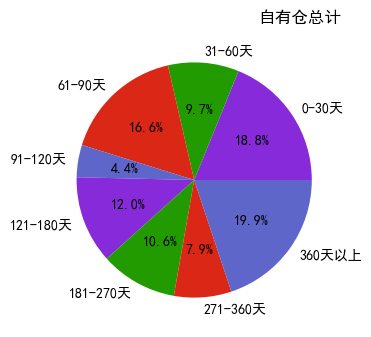

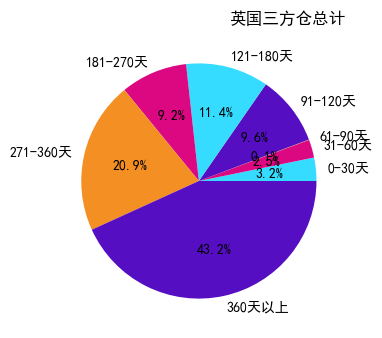

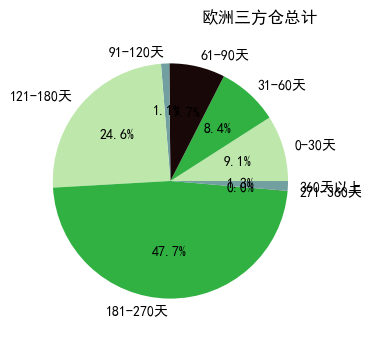

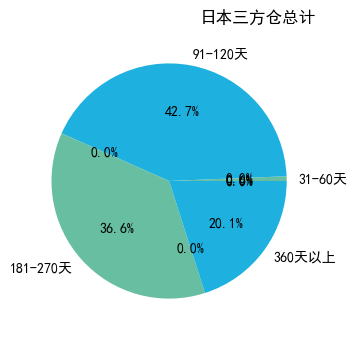

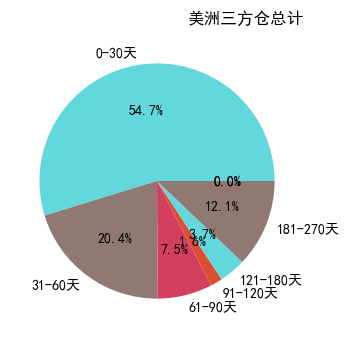

In [19]:
# 画各个仓库龄的饼图

for col in df_仓库总计:
    pie_plot(df_仓库总计, col)
   

### 库存占比

<font color = salmon>__自有仓__</font>

    各个库龄的库存数量占比相对平均，0-30和360天以上的库存数量基本齐平。
    
    值得注意的是，360天以上的库存占比大于前面时间段的，并且每个时间段都有一定的库存，说明很有可能有一批货品一直从0-30天滞留到了360天。

<font color = salmon>__英国三方仓__</font>

    360天以上的库存占比最大，说明有很大一部分的滞留货物。库存占比随着库龄在增加，说明虽然不断有新的货品入库，但是有一小部分滞留货物被不断积压。

<font color = salmon>__欧洲三方仓__</font>

    和英国三方仓的情况类似。

<font color = salmon>__日本三方仓__</font>

    0-90天的库存占比非常小，几乎没有，说明这个仓库入库的货物基本上可以在90天内成功售出且出库。而后面滞留的则是一直很难售出的产品。

<font color = salmon>__美洲三方仓__</font>

    0-30天的库存占比最大，接着是31-60天。360天以上的货物基本没有，这是个好的现象，说明这个仓库的大多数库存可以及时的售出。


如果想要单独分析各个细分仓的库龄数量占比，可以使用下面的code

In [20]:
#for i in range(len(仓库类别)):
 #   for col in 仓库类别[i]:
  #      pie_plot(仓库类别[i], col)

__下面我用折线图和柱状图来呈现库存数量和对应的仓储费__

In [55]:
# create fucntion to generate line and bar plot on different 仓库

def line_bar_plot(df1, df2):
    
    mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
    mpl.rcParams['axes.unicode_minus']= False       #显示负号

    color1 = np.random.rand(4,3)
    

    # 自有仓库存数量的折线图

    kwargs= dict (linestyle='solid', linewidth=1.2)
    ax = df1.plot.line( 
        figsize= (7,5),
        **kwargs,
        alpha = 1,
        color = color1)
    ax.set_ylabel('库存数量', color='blue')
    ax.set_title(f'{df1.name}')

    #在折线图的坐标系上，画自有仓仓储费的柱状图

    ax2  = df2.plot(
    kind = 'bar', 
    figsize =(7,5),
    alpha = 0.8,
    ax = ax.twinx(),
    color = color1)

    ax2.set_ylabel('仓储费（RMB/天）', color='red')

    # 使用log设置y轴的值， 让数据的呈现更加清晰

    ax.legend( loc='upper left', bbox_to_anchor=(-0.3, 1))
    ax2.legend( loc='lower right', bbox_to_anchor=(1.3, 0))
    plt.show()

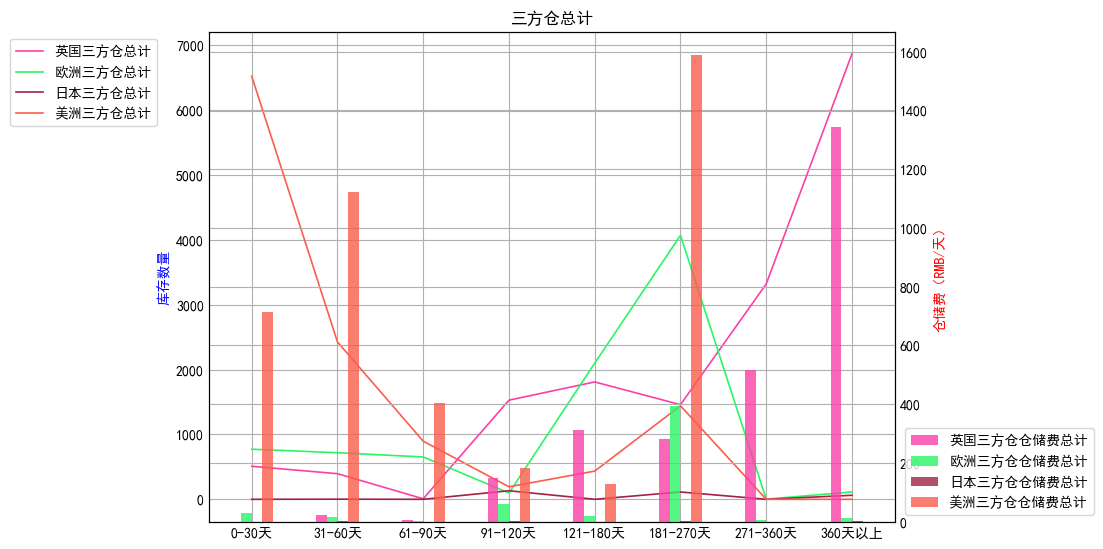

In [56]:
# 画图
line_bar_plot(df_三方仓总计, df_三方仓仓储费总计)

### 三方仓总计

<font color = green>__英国三方仓__</font>

    库存滞留问题较为严重，库龄为360天以上的库存数量达到了7000，是所有三方仓里面最高的。折线图总体上呈上升趋势，说明滞留的库存是不停的累计起来的，持续进货但是却不能及时出库。
    
    仓储费也是随着库存数量的增加而上涨。
***
<font color = green>__欧洲三方仓__</font>

    有一定的库存滞留，这批滞留货物的库龄在半年以上。但是库龄达到270天之后，滞留库存骤减，说明滞留库存货物已经被处理好了。
    
    仓储费也是库存最多的时候达到最大值。
***
<font color = green>__日本三方仓__</font>

    没有严重的滞留问题，因为库存数量小，有一定的滞留也不会产生很大的影响，产生的仓储费也可以忽略不计。
***
<font color = green>__美洲三方仓__</font>

    销售的表现非常好，大多数库存都能在90天内销售出去，但是90天之后出现滞留库存数量增加，说明有一部分商品很难被快速销售出去。但是没有滞留到360天的库存，说明后期有效的处理了之前的滞留库存。
    
    虽然库存数量从0-30天到31-60天有明显的减少，但是仓储费却有增加。可能的原因就有：
    
        （1）31-60天库龄的货物体积较大，因此产生较大的仓储费。
        （2）大多数美洲三方仓在0-30天都不收费，所以即使31-60的库存减少了，因为开始收仓储费，所以仓储费表现出了增加。
    
    值得注意的点是，仓储费在181-270天的阶段达到了最高，也是所有三方仓的最高值。与其对应的库存数量却不是很高，所以很有可能这批库存的体积非常大。在之后的分析中，需要将体积作为单独的指标来进行分析。
***

In [23]:
# 将仓库仓储费_RMB_T汇总整理成更小的分类表

df_自有仓_RMB = df_仓库仓储费_RMB_T[自有仓]
df_英国三方仓_RMB = df_仓库仓储费_RMB_T[英国三方仓]
df_欧洲三方仓_RMB =  df_仓库仓储费_RMB_T[欧洲三方仓]
df_日本三方仓_RMB = df_仓库仓储费_RMB_T[日本三方仓]
df_美洲三方仓_RMB = df_仓库仓储费_RMB_T[美洲三方仓]


# 将仓库汇总整理成更小的分类表

df_自有仓 = df_仓库_T[自有仓]
df_英国三方仓 = df_仓库_T[英国三方仓]
df_欧洲三方仓 =  df_仓库_T[欧洲三方仓]
df_日本三方仓 = df_仓库_T[日本三方仓]
df_美洲三方仓 = df_仓库_T[美洲三方仓]


仓库类别1 = [df_自有仓,df_英国三方仓,df_欧洲三方仓, df_日本三方仓,df_美洲三方仓]
仓库类别2 = [df_自有仓_RMB,df_英国三方仓_RMB, df_欧洲三方仓_RMB, df_日本三方仓_RMB, df_美洲三方仓_RMB]

# 给每个表起名

df_自有仓.name = "自有仓"
df_英国三方仓.name = "英国三方仓"
df_欧洲三方仓.name = "欧洲三方仓"
df_日本三方仓.name = "日本三方仓"
df_美洲三方仓.name = "美洲三方仓"

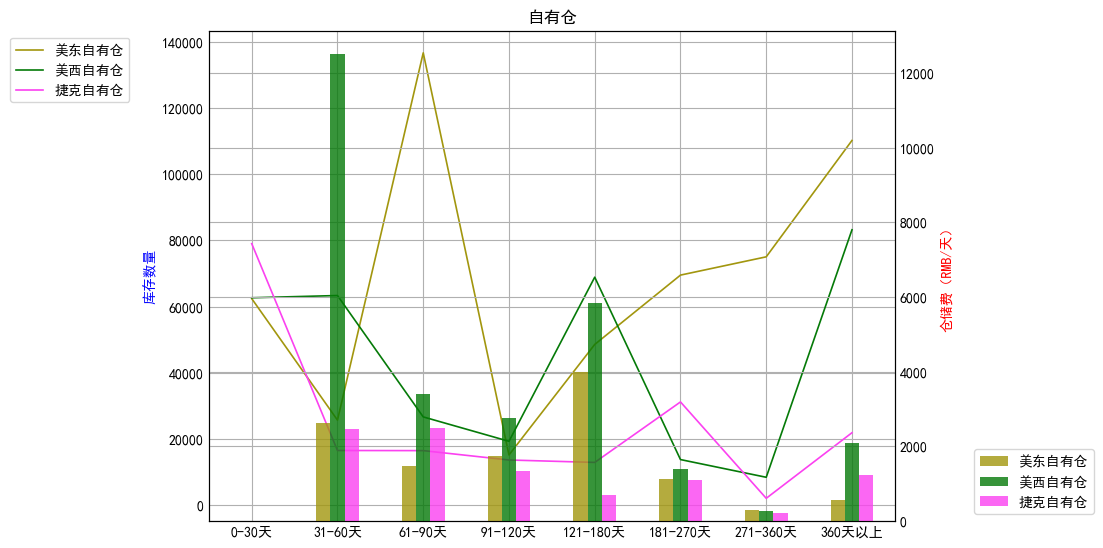

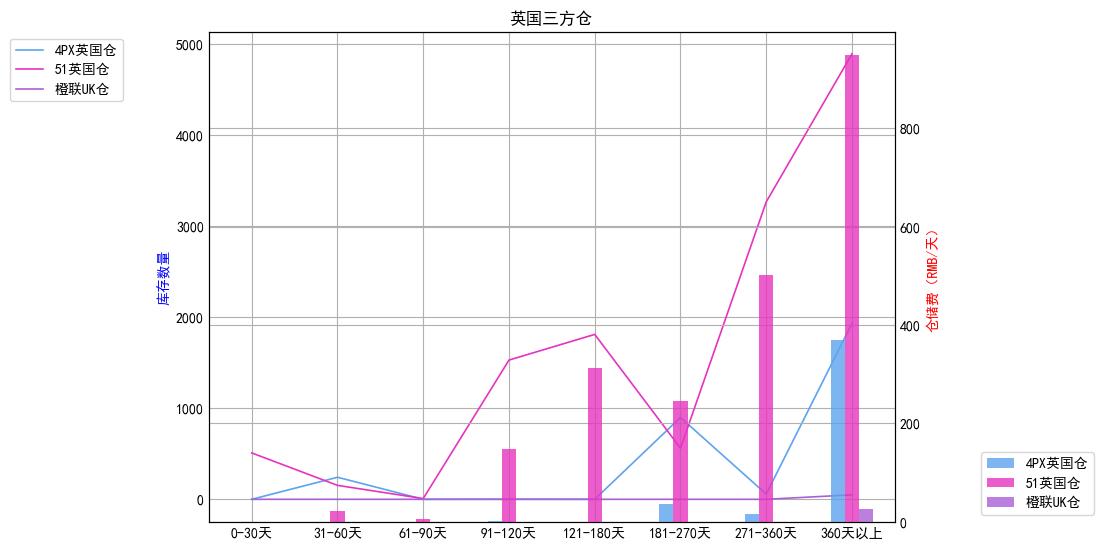

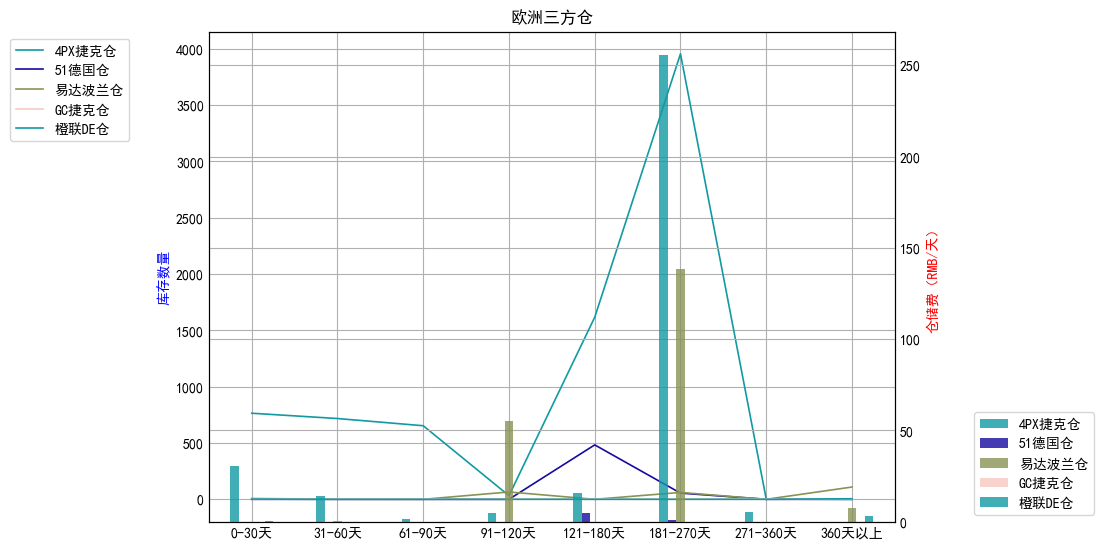

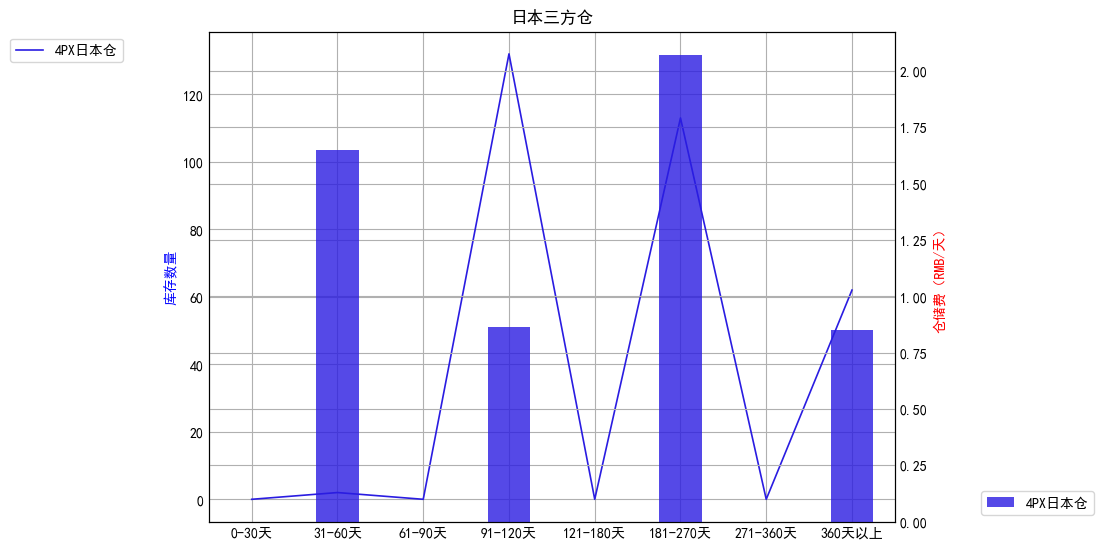

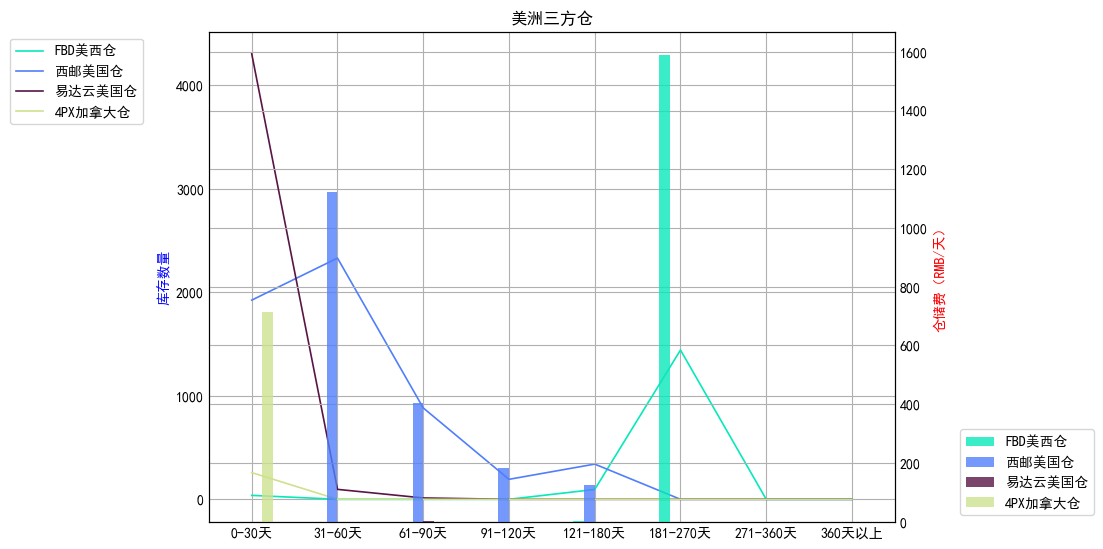

In [57]:
for i in range(len(仓库类别1)):
    line_bar_plot(仓库类别1[i], 仓库类别2[i])
        

### 自有仓 

<font color = green>__美东自有仓__</font>

    总体呈现一个上升趋势，库龄为360天以上的货物数量要多于库龄为0-30天的货物数量，说明有一部分的货物积压，一直没有成功销售。 

    库龄为61-90天的货物数量最多，库龄为91-120天的货物数量最少，说明这个仓库的货物大多数会在61-90天之间成功销售并发出.

    单看仓储费，121-180天得仓储费达到了4000左右的最高值。

    虽然库存数量在61-90天达到了最高峰，但是仓储费却没有出现很大的增幅，甚至少于31-60天阶段的仓储费。


<font color = green>__美西自有仓__</font>

    库龄为360天以上的货物数量高于0-30天库龄的货物数量，说明有一批货物积压，但是少于美东自有仓的积压数量。

    在3个自有仓之中，美西自有仓的仓储费最高。其仓储费在31-60天高达12000，但与其对应的库存数量大概是60000，与0-30天的库存数量基本齐平。

    360天以上库龄的库存数量高达80000， 但是所对应的仓储费只有2000左右。

    对于这个仓库的库存建议是，尽量确保入库的商品可以在30天内售出且出库。

<font color = green>__捷克自有仓__</font>

    货物数量总体上呈下降趋势，说明仓库的货物在持续销售。

    库龄为360天以上的货物少于0-30天的数量，说明只有少部分货物有所积压，但是大多数货物都在稳定的售出。

    总体来看， 仓储费与库存数量呈现一定的正向相关性。

### 英国三方仓 

<font color = green>__4px英国仓__</font>

    总体呈上升趋势，库龄为360天以上的货物最多，大部分的货物一直在仓库积压。

    仓储费与库存数量类似，都在360天以上的库龄达到了最高。其最高仓储费大约为51英国仓的1/2，其原因大概率是因为360天以上库龄的库存数量也为51英国仓的1/2。

<font color = green>__51英国仓__</font>

    和4px英国仓的情况类似，库存数量随着库龄增加而而上涨，说明有一批货物一直滞销。
    
    总体来看，库存数量高的库龄段对应的仓储费也高，这两个值都在360天以上库龄段达到了峰值。
    
    在英国三方仓里面，51英国仓的库存积压问题和仓储费相比而言是最高的。

<font color = green>__橙联UK仓__</font>

    在360天一下的库龄段，库存数量为0。对于这种相对有点极端的数据，有两种可能性：（1）数据有误 （2）数据无误，说明这个仓库有一小批货物从入库一直滞留到360天。
    
    虽然有一小批货物积压，但是数值非常非常小，对库龄的分析没有什么帮助。

### 欧洲三方仓

<font color = green>__4PX捷克仓__</font>

       和其他的几个仓库相比，有着最多的货物积压，库龄为181-270天的货物数量将近4000，如果这一批货物不及时处理，很有可能继续积压下去。
       
       其对应的仓储费也达到了最高值，随着这批货物进入下一个库龄段，可能会产生更高的仓储费。

<font color = green>__51德国仓__</font>

    有少量的库存，库龄为121-180天。因为不同库龄之间货物数量的浮动几乎没有，这一批货物很有可能是从前面积压下来的，算是滞销货物。
    
    仓储费相对而言较低。

<font color = green>__易达波兰仓__</font>

    库龄为360天以上的货物数量最多，中间有少量浮动，说明部分商品很快出售了，而有部分商品一直未能销售。
    
    仓储费在181-270天达到了峰值，所对应的库存数量远低于360天以上的库存数量，说明这一批货物的体积较大，产生了相对较高的仓储费。

<font color = green>__GC捷克仓__</font>

    没有库存

<font color = green>__橙联DE仓__</font>

    库存量非常小，没有很大的参考价值


### 日本三方仓 

<font color = green>__4px日本仓__</font>

    库龄为"0-90天"的库存数量都几乎为0, "91-120天"的货物数量高于120, 但是"121-180天"的货物数量几乎为0。说明这一批货物在积压了90天之后，在进入121天库龄之前都成功售出。

    而"181-270天"的这批货物，积压的更久，在进入271天之前都顺利出货.

    "360天"以上的则属于一直滞销的货物，好在数量相对来说不大。

    整体上4px日本仓的滞留库存问题不严重.对应的仓储费也和库存数量呈正面关系。库存产生的仓储费也相对较低。


### 美洲三方仓 

<font color = green>__FBD美西仓__</font>

    库龄为181-270天的库存数量高达1500左右，有库存滞留的情况，已经滞留半年之久如果不处理，很有可能进入下一个时间段继续滞留。
    
    其对应的仓储费也达到了最高值，在1600左右。

<font color = green>__西邮美国仓__</font>

    总体呈下降趋势，说明入库的货物很快可以出库，没有严重的滞留情况，滞留到90天的货物也只有少数。
    
    仓储费也随着库存量的下降而减少。

<font color = green>__易达云美国仓__</font>

    这几个三方仓里面最好的一个，0-30天的库存高达4000，而滞留到30天以上的不到100。
    
    因为几乎没有库存滞留的情况，与之对应的仓储费的产生也几乎为0.

<font color = green>__4PX加拿大仓__</font>

    表现很不错，虽然只有少量库存，但是没有滞留到30天之后的库存。
    
    但是因为0-30天的阶段也收取仓储费，所以产生了一定的费用。建议入库这个仓库的货物，需要比别的仓库更快的销售，避免在0-30天的阶段产生较多的仓储费。
